# Project: milk quality 
By: odubajo abdul qoyyum


This notebook covers:
- Loading the data
- Data cleaning
- Data preprocessing and data wrangling
- Simple EDA and feature enginnering
- Creating a simple model

### Importing libraries

In [1]:
  # dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files into a pandas dataframe
df = pd.read_csv('milknew.csv')
df.sample(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
325,6.8,45,0,0,0,1,255,medium
831,6.6,45,0,1,1,1,250,high
984,6.8,45,1,1,1,1,245,high
300,6.8,38,0,0,0,0,255,medium
981,6.6,45,0,1,1,1,250,high


###  Data Assessing and cleaning

In [3]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


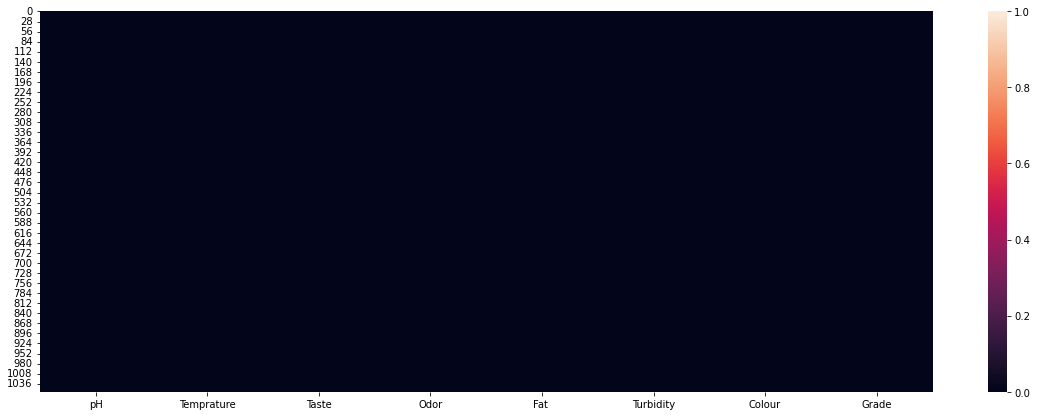

In [4]:
#check missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

- we have no missing values

## Exploratory Data Analysis

In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


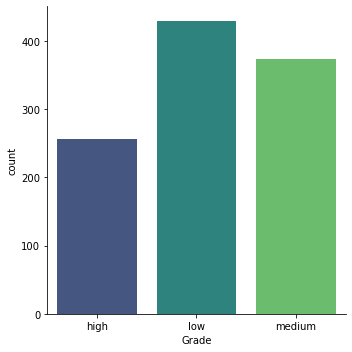

In [6]:
# Explore Target distribution 
sns.catplot(x="Grade", kind="count", data=df,palette='viridis')

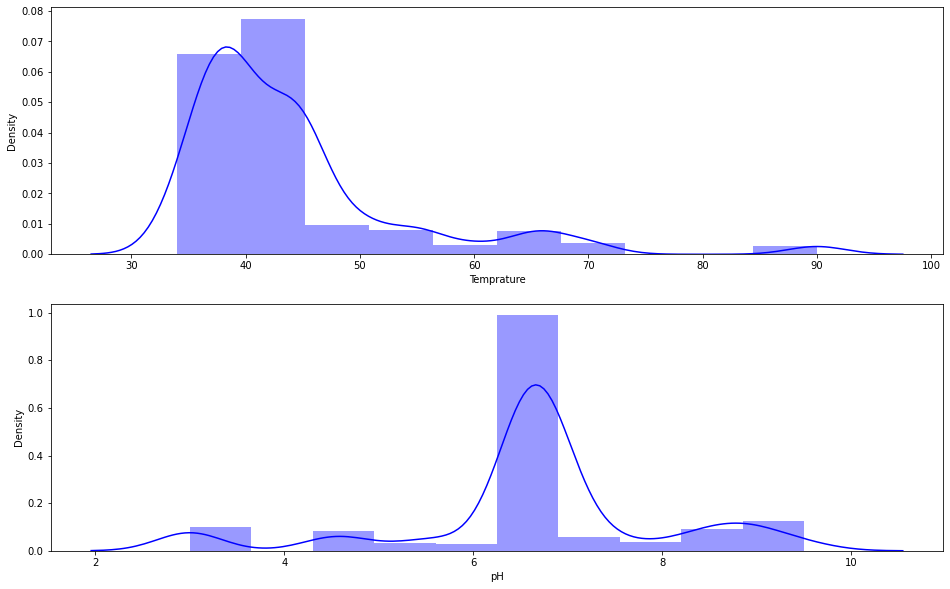

In [7]:
# distribution of temperature and PH

plt.figure(figsize = [16, 10])

# subplot 1: temperature distribution
plt.subplot(2, 1, 1)
sns.distplot(df['Temprature'], bins = 10,color='blue')

# subplot 2: pH distribution
plt.subplot(2, 1, 2)
sns.distplot(df['pH'], bins = 10,color='blue')

plt.show()

###### some of the important features by Grade

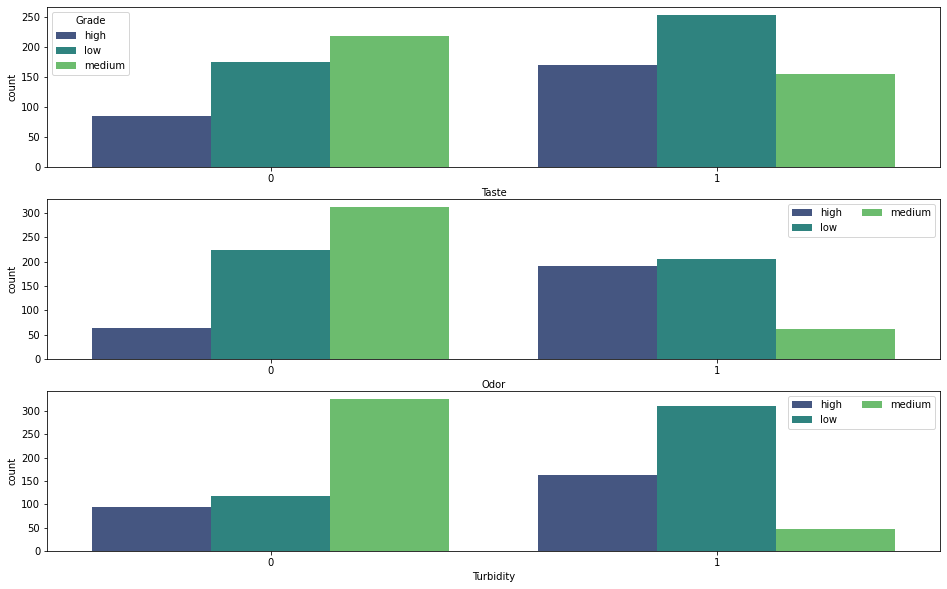

In [8]:
plt.figure(figsize = [16, 10])

# subplot 1: grade by taste
plt.subplot(3, 1, 1)
sns.countplot(data = df, x =  'Taste', hue = 'Grade', palette = "viridis")

# subplot 2: grade by odor
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x='Odor', hue='Grade',  palette = "viridis")
ax.legend(ncol = 2)

# subplot 3: grade by turbidity
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'Turbidity', hue = 'Grade',  palette = "viridis")
ax.legend(loc = 1, ncol = 2) 

plt.show()

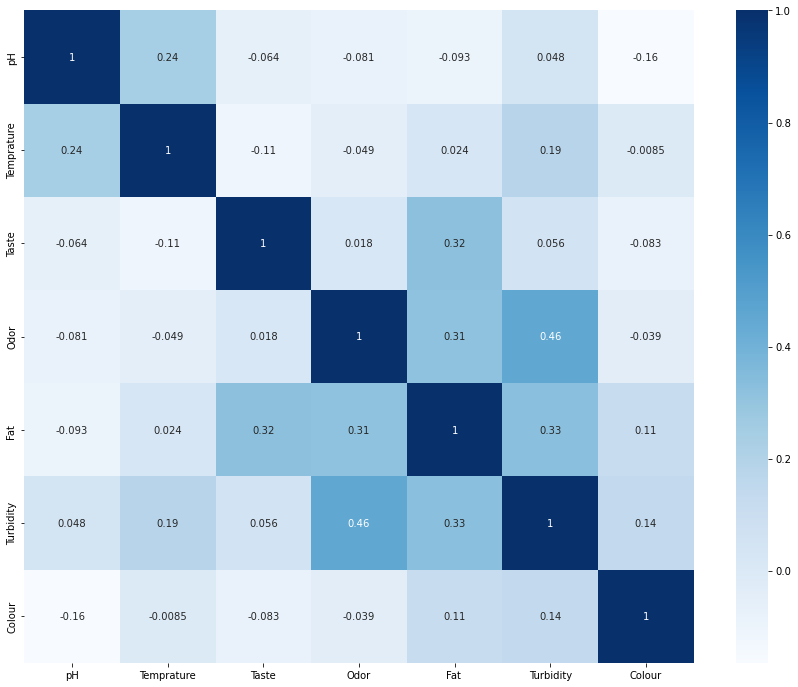

In [9]:
#checking for correlation

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cbar=True, cmap='Blues')
plt.show()

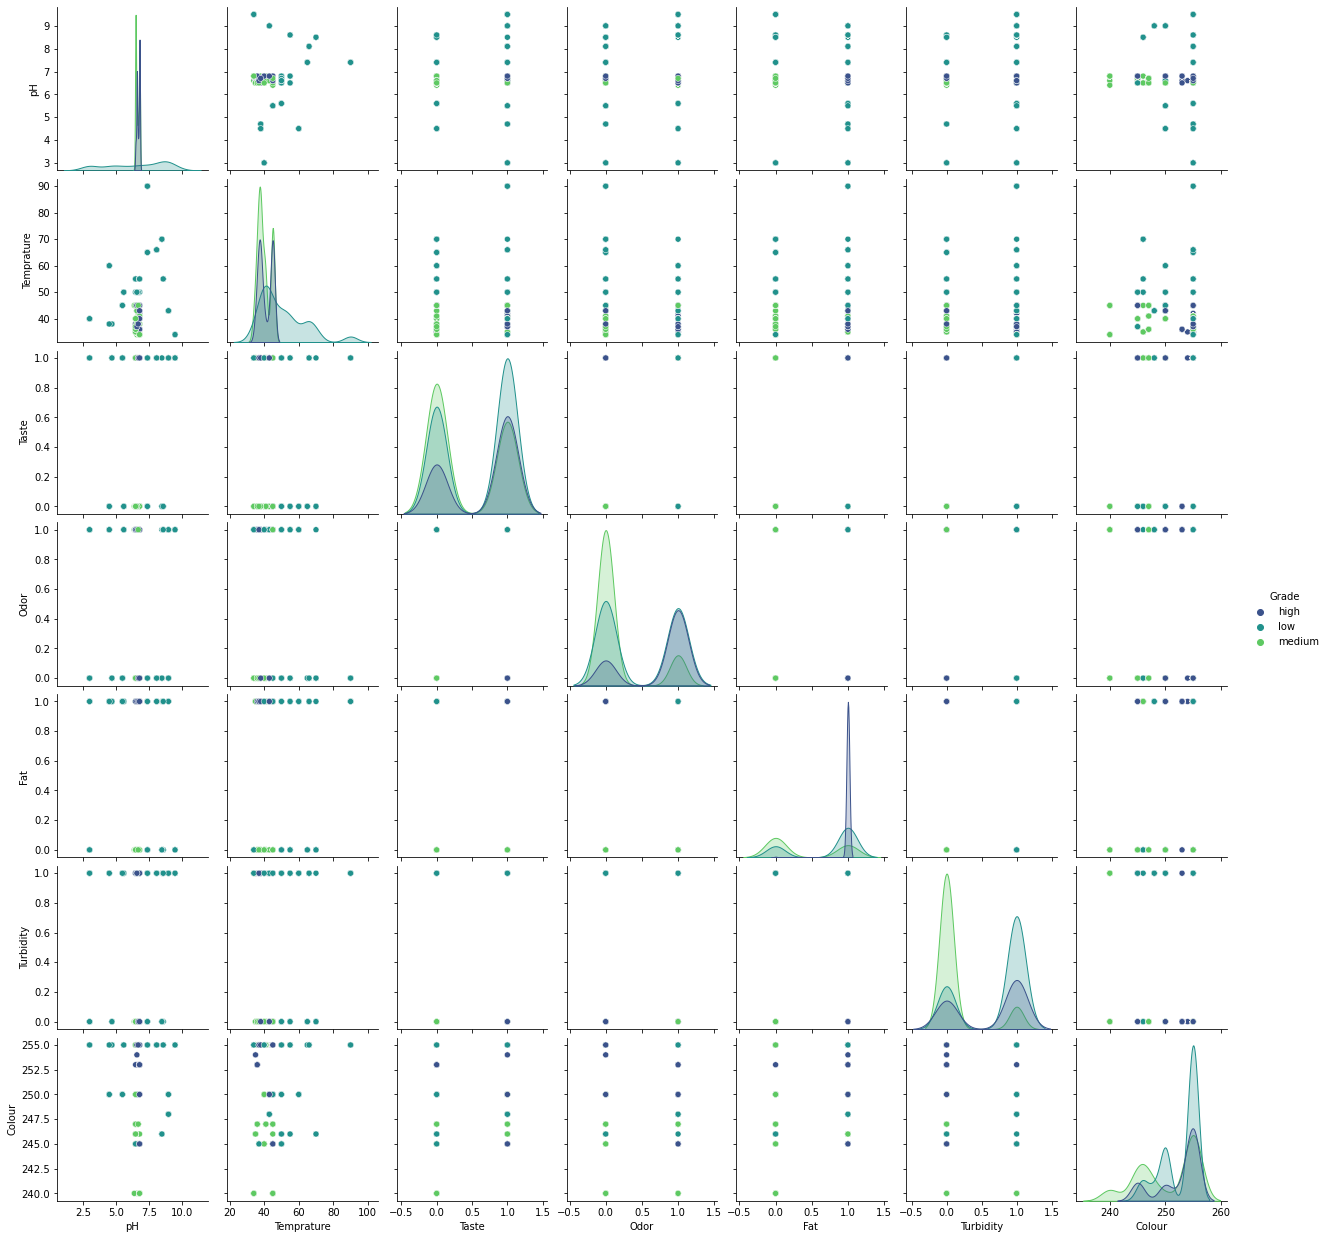

In [10]:
sns.pairplot(df,hue='Grade',palette='viridis')

## Data preprocessing  and model building

In [11]:
#import preprocessing module

from sklearn.pipeline import Pipeline
##feature Scaling
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

### creating numerical processing pipeline

In [12]:
import numpy as np
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]

)

In [13]:
numeric_processor

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaler', StandardScaler())])

### creating categorical processing pipeline

In [14]:
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(
    steps=[("onehot",OneHotEncoder(handle_unknown="ignore"))]

)

categorical_processor

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

### creating the input pipeline

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
input_pipe=ColumnTransformer(
    [("categorical",categorical_processor,["Taste","Odor","Turbidity","Colour"]),
    ("numerical",numeric_processor,["pH","Temprature"])]


)

input_pipe

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Taste', 'Odor', 'Turbidity', 'Colour']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['pH', 'Temprature'])])

### creating the output pipeline

In [17]:
output_pipe = Pipeline([
    ("one_hot", OrdinalEncoder(categories=[["low", "medium", "high"]]))
])

### model training

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Grade',axis=1)
y = df['Grade']


In [20]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [21]:
transformed_X_train = input_pipe.fit_transform(X_train)
transformed_X_test = input_pipe.transform(X_test)

In [22]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [23]:
transformed_y_train = output_pipe.fit_transform(y_train)
transformed_y_test= output_pipe.transform(y_test)

In [24]:
model= SVC()
model.fit(transformed_X_train,transformed_y_train.flatten())

SVC()

In [25]:
y_pred=model.predict(transformed_X_test)

### model evaluation

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(transformed_y_test ,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       126
         1.0       0.93      0.80      0.86       117
         2.0       0.73      0.91      0.81        75

    accuracy                           0.90       318
   macro avg       0.89      0.90      0.89       318
weighted avg       0.91      0.90      0.90       318

